In [2]:
import numpy as np
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Ejercicio 1

In [24]:
p = 4
m = 42
n = 5
phi = 0.6362
gama = 0.55892
mu = 2* np.log(np.tan((phi + gama) / 2))
sigma_cube = (16/((m+n-1)**2))*(1/((np.sin(phi+gama))**2 * np.sin(phi)*np.sin(gama)))
sigma = (sigma_cube)**(1/3)

In [25]:
sigma

0.3026929801559501

In [26]:
np.exp(mu + 0.9793 * sigma) / (1 + np.exp(mu + 0.9793*sigma))

0.38384750116686245

Como el valor del estadístico (0.652) es mayor al valor de $\theta_{0.05}^{TW} = 0.383$ entonces se rechaza la hipótesis nula. Esto implica que al menos dos medias de las 4 variables de las 6 distintas poblaciones son diferentes, es decir que hay al menos dos rizomas que dieron origen a árboles cuyas medias en alguna de las características medidas son distintas. 

# Ejercicio 2

El conjunto de datos obtenidos contiene la información relativa a tres métodos distintos de enseñanza, con 16 observaciones para cada método que indican el nivel de satisfacción de cada estudiante y su calificación en el exámen final de los estudiantes para los distintos métodos.  Se aplica entonces la prueba MANOVA, 

In [27]:
! ls "drive/MyDrive/Data"
data_exams = pd.read_csv("drive/MyDrive/Data/data_exams.csv")

data_exams.csv


In [28]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [29]:
%%R
data_exams = read.csv("drive/MyDrive/Data/data_exams.csv")

In [ ]:
%%R
data_exams

Al aplicar la prueba Lawley Hotelling, se tiene que el valor del estadístico es de 18.987, mientras que utilizando las tablas del libro *Methods of Multivariate Analysis* de Rencher (2012) se obtiene que con un 95% de confianza el valor crítico está dado por 5.1981, por lo que se rechaza la hipótesis nula.

In [31]:
%%R
dep = cbind(data_exams$Test, data_exams$Satisfaction)
prueba = summary(manova(dep ~ data_exams$Method, data = data_exams), test = "Hotelling-Lawley")
prueba

                  Df Hotelling-Lawley approx F num Df den Df   Pr(>F)    
data_exams$Method  1          0.84385   18.987      2     45 1.05e-06 ***
Residuals         46                                                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [32]:
hot_stat = (45/2)*0.84385
hot_stat

18.986625

Al utilizar la lambda de Wilks, se obtiene que el valor del estadístico obtenido es de 0.54234, mientras que el valor crítico para un 95% de confianza es de .726 (utilizando las tablas dle libro *Methods of Multivariate Analysis* de Rencher (2012)), por lo que se rechaza la hipótesis nula al utilizar este estadístico. 

In [33]:
%%R
dep = cbind(data_exams$Test, data_exams$Satisfaction)
prueba = summary(manova(dep ~ data_exams$Method, data = data_exams), test = "Wilks")
prueba

                  Df   Wilks approx F num Df den Df   Pr(>F)    
data_exams$Method  1 0.54234   18.987      2     45 1.05e-06 ***
Residuals         46                                            
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Por último se hace la prueba de Roy, cuyo estadístico es el valor propio más grande, y a su vez se utiliza este valor propio para caluclar $\theta$. En este caso, se tiene que el valor de $\theta = 0.4576$ y que, utilizando el resultado de la clase y la distribución Tracy Widom, el valor crítico con un 95% de confianza es de 0.2149, por lo tanto se rechaza la hipótesis nula, al igual que en las otras dos pruebas aplicadas con anterioridad.

In [34]:
%%R
dep = cbind(data_exams$Test, data_exams$Satisfaction)
prueba = summary(manova(dep ~ data_exams$Method, data = data_exams), test = "Roy")
prueba

                  Df     Roy approx F num Df den Df   Pr(>F)    
data_exams$Method  1 0.84385   18.987      2     45 1.05e-06 ***
Residuals         46                                            
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


A continuación se obtiene el valor del estadístico

In [35]:
lam = 0.84385
teta = lam /(1+lam)
teta

0.45765653388290806

Se obtiene ahora el cuantil mediante la distribución tracy widom

In [36]:
p = 2
m = 48
n = 3
phi = 0.451
gama = 0.3482
mu = 2* np.log(np.tan((phi + gama) / 2))
sigma_cube = (16/((m+n-1)**2))*(1/((np.sin(phi+gama))**2 * np.sin(phi)*np.sin(gama)))
sigma = (sigma_cube)**(1/3)

In [37]:
np.exp(mu + 0.9793 * sigma) / (1 + np.exp(mu + 0.9793*sigma))

0.21492252694798986

Como se puede observar que el valor del estadístico es mayor al valor crítico del 95% de confianza, se rechaza entonces la hipótesis nula. 

# Ejercicio 3

In [8]:
n = 100
p = 100
eigens=[[],[],[],[],[],[],[],[],[],[]]
eigens_todos = []
for i in range(0, 30000):
  H_GUE = np.random.normal(size=(n, n))+(np.random.normal(size=(n, n))* 1j)
  Hsy_GUE = (H_GUE + np.transpose(H_GUE).conjugate())/2.
  w_GUE,v_GUE = np.linalg.eigh(Hsy_GUE)
  eigens_todos.append( np.sqrt(1/(2*n)) * w_GUE)
  w_GUE[::-1].sort()
  for j in range(0,10):
    eigens[j].append(n**(1/6) * (w_GUE[j] - 2 * np.sqrt(n)))

eigens = np.matrix(eigens)
eigens_todos = np.array(eigens_todos).flatten()


Text(0.5, 1.0, 'Distribución de todos los valores propios GUE')

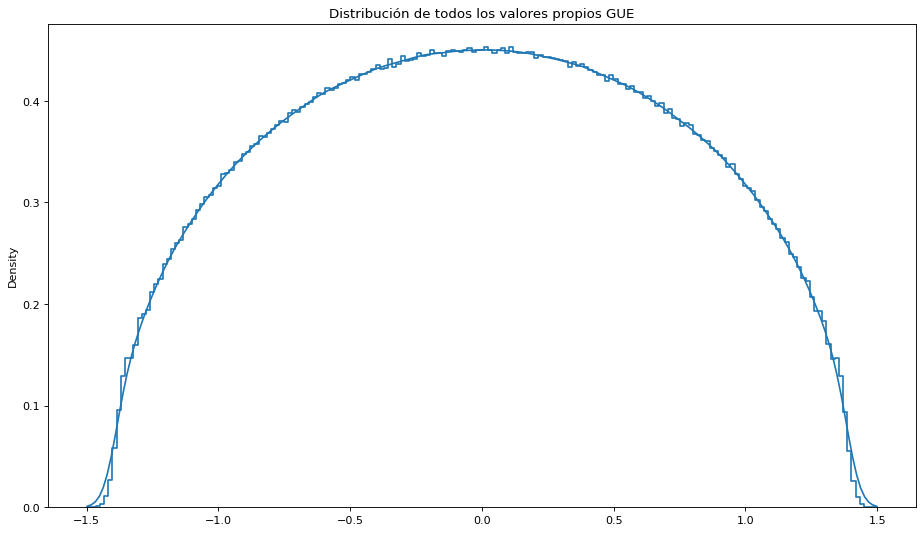

In [10]:
plt.figure(figsize=(14,8), dpi=80)
sns.histplot(data=eigens_todos,stat="density", element="step", fill=False,kde=True, label='GOE').set_title('Distribución de todos los valores propios GUE')

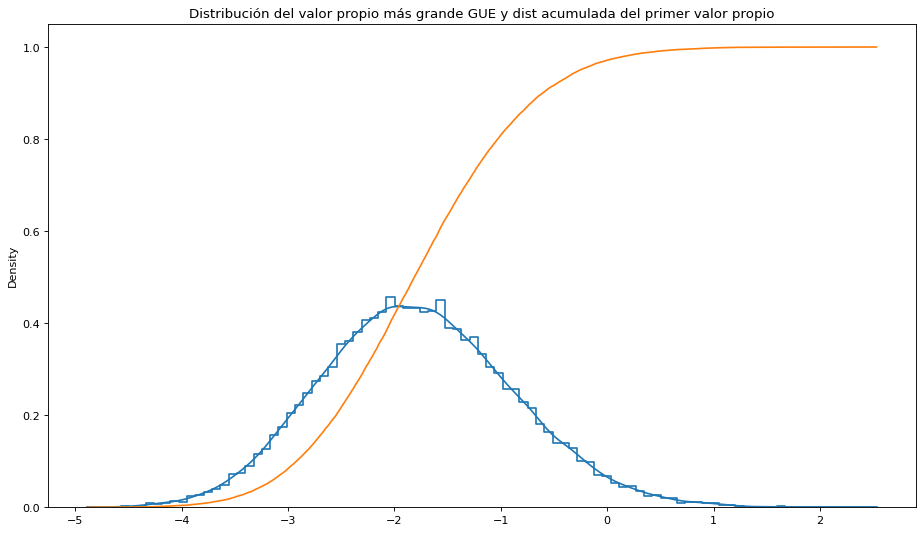

In [11]:
plt.figure(figsize=(14,8), dpi=80)
sns.histplot(data=np.array(eigens[0]).flatten(),stat="density", element="step", fill=False,kde=True).set_title('Distribución del valor propio más grande GUE y dist acumulada del primer valor propio')
eigens_c =np.array(eigens[0]).flatten()
eigens_c.sort()
acum_tracy = ECDF(eigens_c)

plt.plot(eigens_c,acum_tracy(eigens_c).flatten(), label=f'k1-k0 = {i+1}')  

Text(0.5, 1.0, 'Distribución del 5to valor propio más grande')

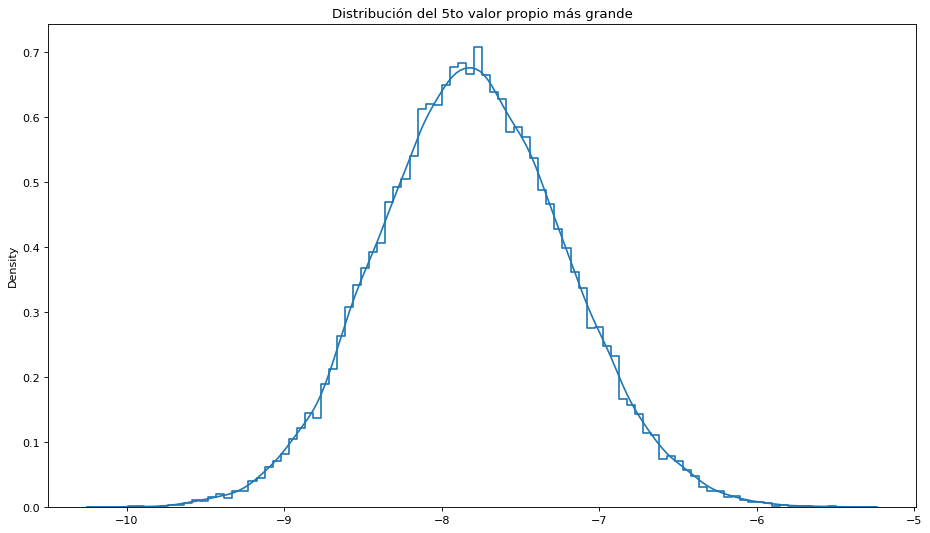

In [12]:
plt.figure(figsize=(14,8), dpi=80)
sns.histplot(data=np.array(eigens[4]).flatten(),stat="density", element="step", fill=False,kde=True, label='GOE').set_title('Distribución del 5to valor propio más grande')

Text(0.5, 1.0, 'Distribución del 10m0 valor propio más grande GUE')

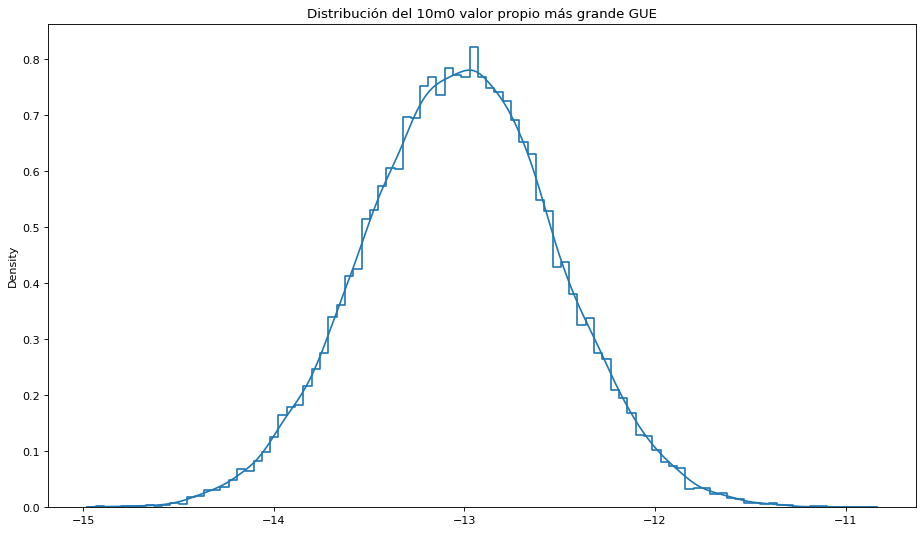

In [13]:
plt.figure(figsize=(14,8), dpi=80)
sns.histplot(data=np.array(eigens[9]).flatten(),stat="density", element="step", fill=False,kde=True, label='GOE').set_title('Distribución del 10m0 valor propio más grande GUE')

In [14]:
R_ks = [[], [], [], [], [], [], [], []]
comulatives = [[], [], [], [], [], [], [], []]
for i in range(0,8):
  resp = []
  for j in range(0, i+1):
    resp.append(np.array((eigens[j,:] - eigens[j+1,:]) / (eigens[j+1,:] - eigens[j+2,:])).flatten())
  resp = np.max(resp,axis = 0)
  resp.sort()
  R_ks[i] = resp
  comulatives[i] = ECDF(resp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


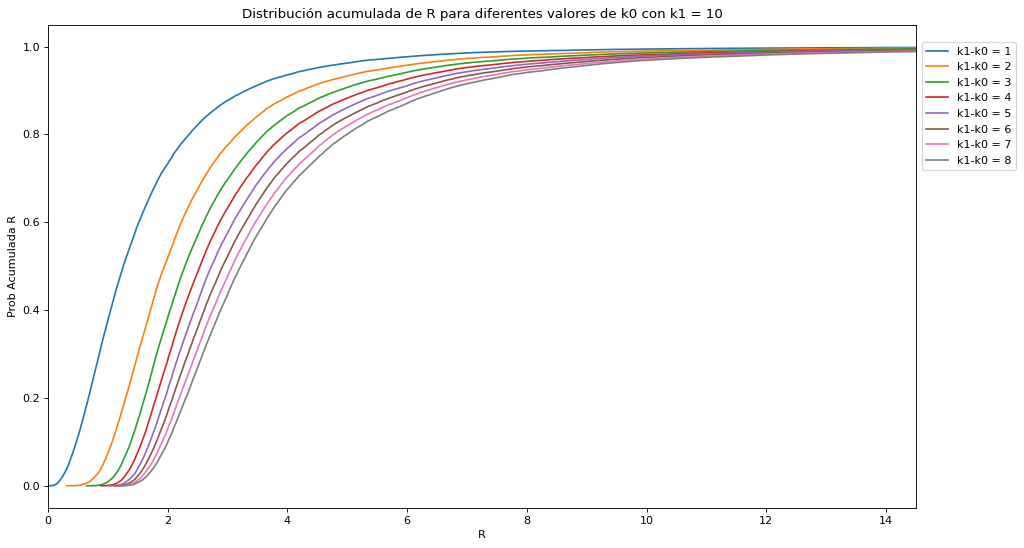

In [15]:
plt.figure(figsize=(14,8), dpi=80)
for i in range(0, 8):
  plt.plot(R_ks[i], comulatives[i](R_ks[i]).flatten(), label=f'k1-k0 = {i+1}')  

plt.xlim([0, 14.5])
ax = plt.axes()
ax.set_xlabel('R')
ax.set_ylabel('Prob Acumulada R')
plt.title("Distribución acumulada de R para diferentes valores de k0 con k1 = 10")
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))

In [35]:
quantiles = [.85, .90, .91, .92, .93, .94, .95, .96, .97, .98, .99]
quant_ind = 1 - np.array(quantiles)
resp = np.quantile(R_ks, quantiles, axis = 1)

In [37]:
resp = pd.DataFrame(resp, columns=['1', '2', '3', '4', '5', '6', '7', '8'])

In [38]:
resp.set_axis(quant_ind)

,1,2,3,4,5,6,7,8
0.15,2.720206,3.576375,4.085695,4.493610,4.844001,5.146447,5.400306,5.641964
0.10,3.308277,4.232140,4.858056,5.331076,5.731314,6.066133,6.338163,6.589378
0.09,3.467250,4.423213,5.064730,5.589475,5.984267,6.291459,6.580477,6.840883
0.08,3.641527,4.639542,5.302033,5.837148,6.217639,6.568173,6.854700,7.160461
0.07,3.862185,4.914667,5.619308,6.115484,6.537090,6.869838,7.216581,7.529704
0.06,4.127693,5.219672,5.953571,6.465850,6.872441,7.288096,7.645742,7.965411
0.05,4.446055,5.647505,6.323086,6.870199,7.396399,7.778241,8.211378,8.538847
0.04,4.878865,6.121198,6.825158,7.513222,8.017914,8.512833,8.899894,9.200966
0.03,5.434824,6.768438,7.620928,8.367391,8.937025,9.380809,9.769233,10.166908
0.02,6.302367,7.819906,8.926219,9.715717,10.260803,10.840419,11.437723,11.857717
